# 1. Import the necessary libraries

In [541]:
# Import the necessary libraries
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px

# 2. Load the Data Set

MOVIE RATING PREDICTION WITH PYTHON
Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.

The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.

Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.


In [571]:
file_path = 'IMDb Movies India.csv'
# Read the CSV file with a specific encoding (e.g., 'latin-1')
df = pd.read_csv(file_path, encoding='latin-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Analyze the Data Set

In [543]:
# Display information about the DataFrame
df.info()
# Remark: This line prints a concise summary of the DataFrame, including the column names, data types, and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [544]:
# Calculate the number of unique values in each column of the DataFrame
df.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

In [545]:
# Get the column labels of the DataFrame
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

## Dataset Information

The dataset contains movie rating prediction data and Upon inspecting the dataset using the `df.info()` command, the current data types of the columns are as follows:

- 'Name': object
- 'Year': object
- 'Duration': object
- 'Genre': object
- 'Rating': float64
- 'Votes': object
- 'Director': object
- 'Actor 1', 'Actor 2', 'Actor 3': object

To ensure proper analysis during the exploratory data analysis (EDA) process, it is recommended to change the data types of certain columns as follows:

- 'Name': Change the data type to 'category'.
- 'Year': Change the data type to 'int'.
- 'Duration': Change the data type to 'int'.
- 'Genre': Change the data type to 'category'.
- 'Rating': Change the data type to either 'float' or 'int', depending on whether decimal values are present.
- 'Votes': Change the data type to 'int'.
- 'Director': Change the data type to 'category'.
- 'Actor 1', 'Actor 2', 'Actor 3': Change the data types to 'category'.

By adjusting the data types accordingly, we can improve memory efficiency and ensure accurate analysis.

In [546]:
# Display the sum of all null values in dataset
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [547]:
# Get the value counts for each director and sort the values in descending ordert
top_directors=df['Director'].value_counts().sort_values(ascending=False).head(10)
top_directors

Director
Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
Nanabhai Bhatt      46
Dhirubhai Desai     46
B.R. Ishara         44
David Dhawan        44
Mohammed Hussain    44
Name: count, dtype: int64

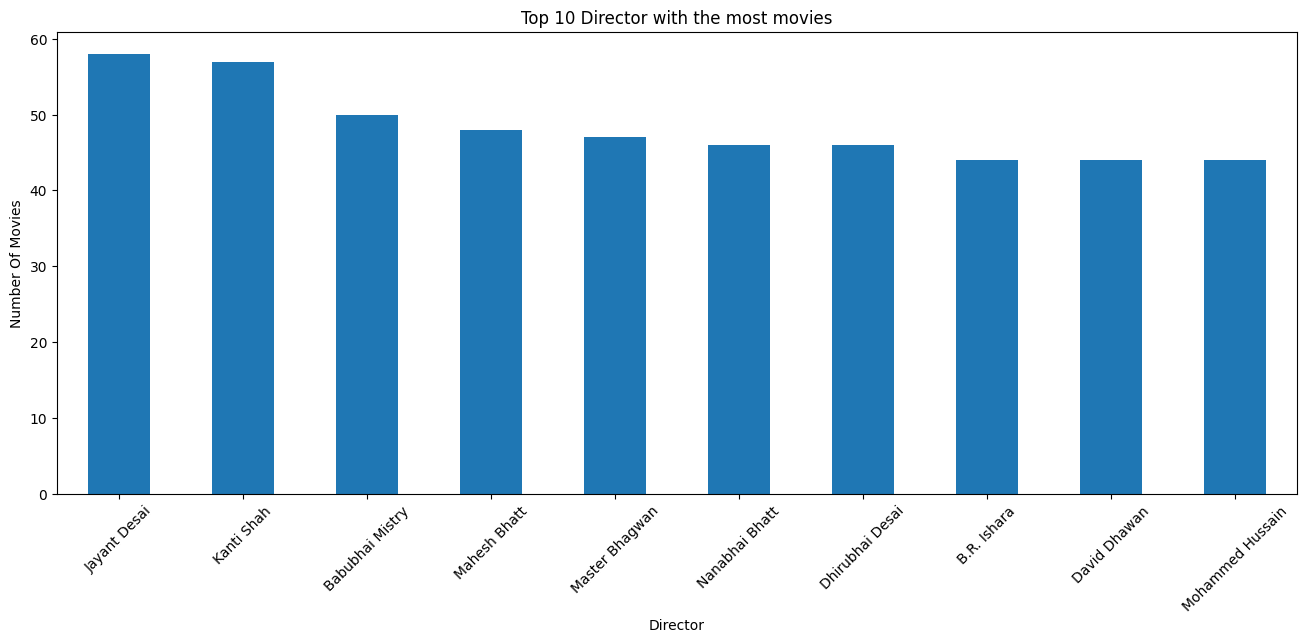

In [570]:
plt.figure(figsize=(16, 6)) # make figure size
# Extract the top 10 directors with the most occurrences in the 'Director' column
top_directors=df['Director'].value_counts().sort_values(ascending=False).head(10)
top_directors.plot(kind='bar') # Plotting the data as a bar plot
plt.xlabel('Director') # add the x-axis labels
plt.ylabel('Number Of Movies') # add the labels for y-axis
plt.title('Top 10 Director with the most movies')  # add the title for the plot
plt.xticks(rotation=45)  # Rotating x-axis labels by 45 degrees
plt.show()

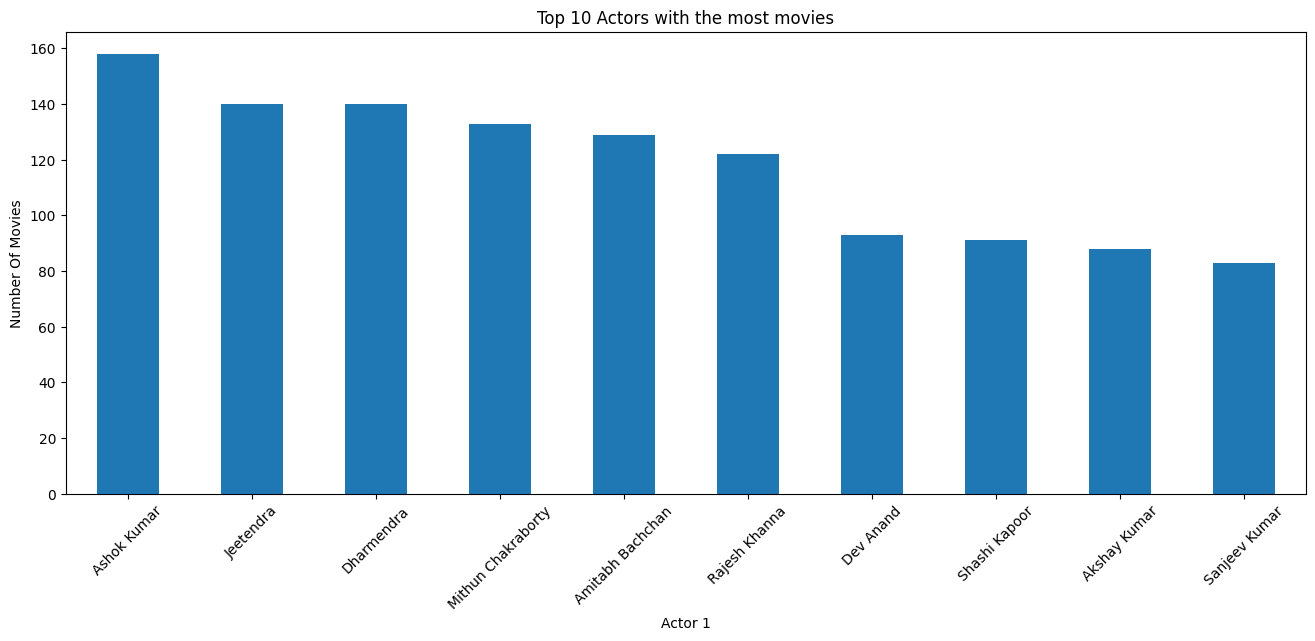

In [549]:
plt.figure(figsize=(16, 6)) # make figure size
# Extract the top 10 Actors with the most occurrences in the 'Actor 1' column
top_directors=df['Actor 1'].value_counts().sort_values(ascending=False).head(10)
top_directors.plot(kind='bar') # Plotting the data as a bar plot
plt.xlabel('Actor 1') # add the x-axis labels
plt.ylabel('Number Of Movies') # add the labels for y-axis
plt.title('Top 10 Actors with the most movies')  # add the title for the plot
plt.xticks(rotation=45)  # Rotating x-axis labels by 45 degrees
plt.show()


In [550]:
# Calculate the percentage of missing values in each column
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False) 
# Remark: This line calculates the percentage of missing values in each column and sorts them in descending order

Duration    53.317429
Rating      48.939326
Votes       48.932878
Actor 3     20.272100
Actor 2     15.371720
Genre       12.102650
Actor 1     10.426204
Year         3.404475
Director     3.385131
Name         0.000000
dtype: float64

In [551]:
# Calculate the number of unique values in Duration column of the DataFrame
df['Duration'].unique()

array([nan, '109 min', '90 min', '110 min', '105 min', '147 min',
       '142 min', '59 min', '82 min', '116 min', '96 min', '120 min',
       '161 min', '166 min', '102 min', '87 min', '132 min', '66 min',
       '146 min', '112 min', '168 min', '158 min', '126 min', '94 min',
       '138 min', '124 min', '144 min', '157 min', '136 min', '107 min',
       '113 min', '80 min', '122 min', '149 min', '148 min', '130 min',
       '121 min', '188 min', '115 min', '103 min', '114 min', '170 min',
       '100 min', '99 min', '140 min', '128 min', '93 min', '125 min',
       '145 min', '75 min', '111 min', '134 min', '85 min', '104 min',
       '92 min', '137 min', '127 min', '150 min', '119 min', '135 min',
       '86 min', '76 min', '70 min', '72 min', '151 min', '95 min',
       '52 min', '89 min', '143 min', '177 min', '117 min', '123 min',
       '154 min', '88 min', '175 min', '153 min', '78 min', '139 min',
       '133 min', '101 min', '180 min', '60 min', '46 min', '164 min',
       '

In [552]:
df['Duration'] = df['Duration'].astype(str)
# Replacing ' min' and converting to integers, handling NaN values
df['Duration'] = df['Duration'].str.replace(' min', '', regex=False)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce').astype('Int64')
# Displaying sum of unique values
df['Duration'].nunique()


182

In [553]:
# Convert the 'Duration' column to float data type
df['Duration']=df['Duration'].astype(float)
# Fill missing values in the 'Duration' column with the mean of existing values
df['Duration'].fillna(df['Duration'].mean(),inplace=True)
# Check the number of remaining null values in the 'Duration' column
df['Duration'].isnull().sum()

0

In [554]:
# Displaying unique values in Votes column
df['Votes'].unique()

array([nan, '8', '35', ..., '70,344', '408', '1,496'], dtype=object)

In [555]:
# Remove commas from 'Votes' column if present
df['Votes'] = df['Votes'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
# Remove dollar signs from 'Votes' column if present
df['Votes'] = df['Votes'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
# Remove 'M' (indicating millions) from 'Votes' column if present
df['Votes'] = df['Votes'].apply(lambda x: x.replace('M', '') if 'M' in str(x) else x)
# Convert 'Votes' to float type
df['Votes']=df['Votes'].astype(float)
# Fill missing values in the 'Votes' column with the mean of existing values
df['Votes'].fillna(df['Votes'].mean(),inplace=True)
df['Votes'].isnull().sum() # Check the number of remaining null values in the 'Votes' column

0

In [556]:
# Convert 'Year' column to string
df['Year'] = df['Year'].astype(str)
# Remove non-numeric characters and convert to integers, handling empty strings and NaN
def clean_year(year):
    year = ''.join(filter(str.isdigit, year))
    if year:
        return int(year)
    return np.nan
df['Year'] = df['Year'].apply(clean_year)
# Filling NaN values with the mean of the column
df['Year'].fillna(df['Year'].mean(), inplace=True)
# Checking for null values after filling NaN
null_values_count = df['Year'].isnull().sum()
print("Number of null values in 'Year' column:", null_values_count)

Number of null values in 'Year' column: 0


In [557]:
# Fill missing values in the 'Rating' column with the mean of existing values
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
df['Rating']

0        5.841621
1        7.000000
2        5.841621
3        4.400000
4        5.841621
           ...   
15504    4.600000
15505    4.500000
15506    5.841621
15507    5.841621
15508    6.200000
Name: Rating, Length: 15509, dtype: float64

In [558]:
# Display summary statistics for numerical columns in the DataFrame
df.describe() 
#it also shows that we have converted Year, Duration and Votes columns into Numeric Data type.

,Year,Duration,Rating,Votes
count,15509.000000,15509.000000,15509.000000,15509.000000
mean,1987.012215,128.126519,5.841621,1938.276283
std,24.980261,19.753788,0.987343,8290.467955
min,1913.000000,2.000000,1.100000,5.000000
25%,1969.000000,128.126519,5.841621,52.000000
50%,1990.000000,128.126519,5.841621,1938.276283
75%,2008.000000,129.000000,6.000000,1938.276283
max,2022.000000,321.000000,10.000000,591417.000000


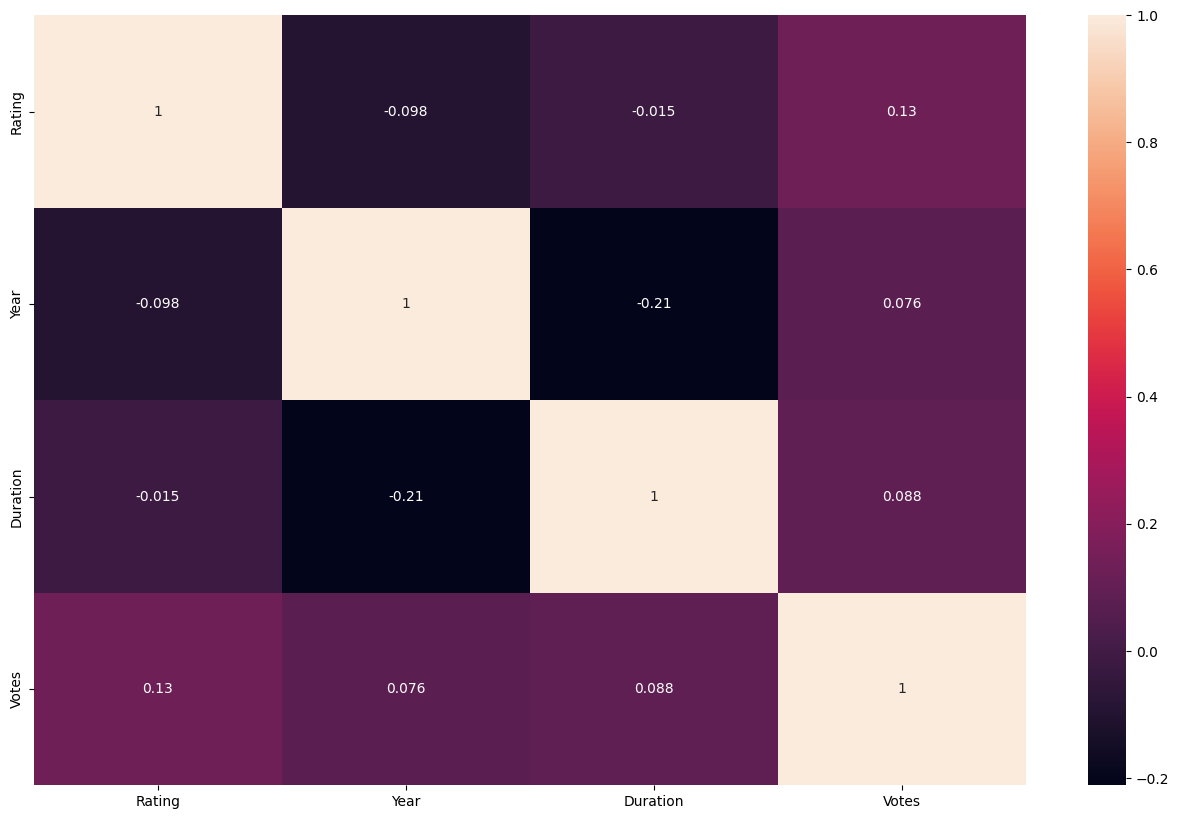

In [559]:
# Make a correlation matrix of numeric columns
plt.figure(figsize=(16, 10)) # make figure size  
numeric_cols = ['Rating', 'Year', 'Duration', 'Votes'] # make a list of numeric columns
sns.heatmap(df[numeric_cols].corr(), annot=True) # plot the correlation matrix
plt.show()

In [560]:
df['Actor 1']

0                Manmauji
1            Rasika Dugal
2            Sayani Gupta
3                 Prateik
4            Rajat Kapoor
               ...       
15504    Naseeruddin Shah
15505        Akshay Kumar
15506     Sangeeta Tiwari
15507                 NaN
15508          Dharmendra
Name: Actor 1, Length: 15509, dtype: object

In [561]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder for encoding categorical variables
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier for decision tree-based classification
from sklearn.ensemble import RandomForestClassifier   # Import RandomForestClassifier for random forest-based classification
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier for k-nearest neighbors classification
from sklearn.linear_model import LinearRegression,LogisticRegression # Import LinearRegression and LogisticRegression for regression and logistic regression respectively
from sklearn.svm import SVC # Import SVC for support vector classification

In [562]:
df.isnull().sum()

Name           0
Year           0
Duration       0
Genre       1877
Rating         0
Votes          0
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [563]:
import pandas as pd
# Your DataFrame 'df' with a column 'ColumnName' containing NaN values
# Removing NaN values from the 'ColumnName' column
df.dropna(subset=['Year'], inplace=True)
df.dropna(subset=['Duration'], inplace=True)
df.dropna(subset=['Votes'], inplace=True)
df.isnull().sum()



Name           0
Year           0
Duration       0
Genre       1877
Rating         0
Votes          0
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [564]:
# Split adnd store the columns into input and output variable
X = df[['Year','Duration','Votes' ]]
Y=df['Rating']

In [565]:
from sklearn.model_selection import train_test_split
#  X and Y contain feature matrix and target variable respectively
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Define a list of models
models = [LinearRegression(),LogisticRegression()]
# Define corresponding names for the models
model_names = ['Linear Regression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN']


In [566]:
# Instantiate a Linear Regression model
model=LinearRegression()
# Train the model using the training data
model.fit(X_train, y_train)
# Use the trained model to predict values for the test data
y_pred = model.predict(X_test)
y_pred

array([5.84733097, 5.69602269, 6.055234  , ..., 5.84733097, 5.80943235,
       5.75514403])

In [567]:
from sklearn.metrics import mean_absolute_error
# Assuming y_test and y_pred are your true target values and predicted values, respectively
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.5962627583507992


In [568]:

# Get the parameters of the Linear Regression model
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [569]:
from sklearn.model_selection import GridSearchCV
import numpy as np
#create a model
model = LinearRegression()
# define parameter grid
param_grid = {'copy_X':[ True, False], 'fit_intercept': [True,False] }
#object grid search cv (Creating the model)
grid_search = GridSearchCV(model, param_grid,cv=5 )
#traing the model
grid_search.fit(X,Y)
# print the best parameters
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'copy_X': True, 'fit_intercept': True}
Best Score:  0.025288500880801545
